### Problem Statement

An education company named X Education sells online courses to industry professionals. Although X Education gets a lot of leads, its lead conversion rate i.e coversion rate of potential leads is very poor.The comapany wants to increase the lead coversion rate.

#### The Goal:

As an analyst, we are required to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [1]:
#suppress  warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
#Reading the given dataset
leads = pd.read_csv("Leads.csv")
leads.head()   #displaying the datasframe.

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape  #displaying the shape of the dataframe.

(9240, 37)

In [5]:
leads.info()   #displaying the info about attribute datatypes and null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Data Observation and Cleaning

In [6]:
#Dropping the first column which adds no meaning to the data.
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [7]:
#Renaming some columns for better readability.
leads.rename(columns={'Total Time Spent on Website':'Time_spent','How did you hear about X Education':'Source_Discovery','What is your current occupation':'Occupation','What matters most to you in choosing a course':'Join_Purpose','Receive More Updates About Our Courses':'Updates_info','I agree to pay the amount through cheque':'Cheque_pay','A free copy of Mastering The Interview':'Interview','Update me on Supply Chain Content':'supplychain_update','Get updates on DM Content':'DM_update'},inplace=True)

In [8]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time_spent,Page Views Per Visit,Last Activity,Country,Specialization,Source_Discovery,Occupation,Join_Purpose,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Updates_info,Tags,Lead Quality,supplychain_update,DM_update,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Cheque_pay,Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Checking the null values of the dataset and their percentage.
leads.isnull().sum()  
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
Time_spent                      0.00
Page Views Per Visit            1.48
Last Activity                   1.11
Country                        26.63
Specialization                 15.56
Source_Discovery               23.89
Occupation                     29.11
Join_Purpose                   29.32
Search                          0.00
Magazine                        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
Updates_info                    0.00
Tags                           36.29
Lead Quality                   51.59
supplychain_update              0.00
DM_update                       0.00
Lead Profile                   29.32
C

In [10]:
#We can drop the columns which have null values more than 50%
#So, dropping the column "Lead Quality" from the dataset.
leads.drop("Lead Quality", axis=1, inplace=True)

In [11]:
leads.shape

(9240, 34)

In [12]:
leads.describe()   

,Converted,TotalVisits,Time_spent,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Imputing the missing values 

In [13]:
#From the data,some columns have missing values,imputing them with mean or mode based on the varialbe type.

In [14]:
leads['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
NC_EDM               0.000109
blog                 0.000109
testone              0.000109
Pay per Click Ads    0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64

In [15]:
#Finding the "Lead Source" column mode.
Leadsource_mode = leads['Lead Source'].mode()[0]
Leadsource_mode

'Google'

In [16]:
#Imputing the "Lead Source" column with the mode.
leads['Lead Source'].fillna(Leadsource_mode,inplace=True)
leads['Lead Source'].isnull().sum()   #checking the null values after imputation

0

In [17]:
#Imputing the "TotalVisits" numerical column with the mean.
leads['TotalVisits'].fillna(leads['TotalVisits'].mean(),inplace=True)
leads['TotalVisits'].isnull().sum()  #checking the null values after imputation

0

In [18]:
#Imputing the "Page Views Per Visit" numerical column with the mean
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean(),inplace=True)
leads['Page Views Per Visit'].isnull().sum()   #checking the null values after imputation

0

In [19]:
leads['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Marked Spam               0.000219
Email Received                  0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [20]:
#Finding the "Last Activity" column mode.
Lastactivity_mode = leads['Last Activity'].mode()[0]
Lastactivity_mode

'Email Opened'

In [21]:
#Imputing the "Last Activity" column with the mode.
leads['Last Activity'].fillna(Lastactivity_mode,inplace=True)
leads['Last Activity'].isnull().sum()  #checking the null values after imputation 

0

In [22]:
leads.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Nigeria                 0.000590
Germany                 0.000590
South Africa            0.000590
Canada                  0.000590
Kuwait                  0.000590
Sweden                  0.000443
Asia/Pacific Region     0.000295
Bangladesh              0.000295
China                   0.000295
Belgium                 0.000295
Uganda                  0.000295
Ghana                   0.000295
Italy                   0.000295
Philippines             0.000295
Netherlands             0.000295
Switzerland             0.000148
Vietnam                 0.000148
Malaysia  

In [23]:
#As the column "Country" has high skewness we can drop the column
leads.drop('Country',axis=1,inplace=True)

In [24]:
leads.Specialization.value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [25]:
#The above column has "Select" value referring to NaN. So,Replacing "Select" with NaN's in all the columns of the dataset.
leads.replace("Select",np.nan,inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time_spent,Page Views Per Visit,Last Activity,Specialization,Source_Discovery,Occupation,Join_Purpose,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Updates_info,Tags,supplychain_update,DM_update,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Cheque_pay,Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [26]:
#Checking the null values of the dataset and their percentage after replacing NaN values.
leads.isnull().sum()  
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                     0.00
Lead Source                     0.00
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     0.00
Time_spent                      0.00
Page Views Per Visit            0.00
Last Activity                   0.00
Specialization                 36.58
Source_Discovery               78.46
Occupation                     29.11
Join_Purpose                   29.32
Search                          0.00
Magazine                        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
Updates_info                    0.00
Tags                           36.29
supplychain_update              0.00
DM_update                       0.00
Lead Profile                   74.19
City                           39.71
Asymmetrique Activity Index    45.65
A

In [27]:
#Dropping the columns having high null percentage.
leads.drop(['Source_Discovery','Lead Profile'],axis=1,inplace=True)

In [28]:
leads.Occupation.value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: Occupation, dtype: float64

In [29]:
#Imputing the "Occupation" column with the mode.
leads.Occupation.fillna("Unemployed",inplace=True)
leads.Occupation.isnull().sum()   #checking the null values after imputation 

0

In [30]:
leads.Join_Purpose.value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: Join_Purpose, dtype: float64

In [31]:
#As the column "Join_Purpose" has high skewness we can drop the column
leads.drop('Join_Purpose',axis=1,inplace=True)

In [32]:
leads.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [33]:
#As the "Tags" column doesn't add meaning to the data,dropping the column.
leads.drop(["Tags"],axis=1,inplace=True)

In [34]:
leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [35]:
leads.City.fillna("Mumbai",inplace=True)
leads.City.isnull().sum()

0

In [36]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [37]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [38]:
#Dropping some more columns which has 45% null values and the redundant ones.
leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score'],axis=1,inplace=True)

In [39]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time_spent,Page Views Per Visit,Last Activity,Specialization,Occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Updates_info,supplychain_update,DM_update,City,Cheque_pay,Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [40]:
leads.describe()

,Converted,TotalVisits,Time_spent,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


## leads.info()

In [41]:
#Finding the null percentage of all the columns.
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                 0.00
Lead Source                 0.00
Do Not Email                0.00
Do Not Call                 0.00
Converted                   0.00
TotalVisits                 0.00
Time_spent                  0.00
Page Views Per Visit        0.00
Last Activity               0.00
Specialization             36.58
Occupation                  0.00
Search                      0.00
Magazine                    0.00
Newspaper Article           0.00
X Education Forums          0.00
Newspaper                   0.00
Digital Advertisement       0.00
Through Recommendations     0.00
Updates_info                0.00
supplychain_update          0.00
DM_update                   0.00
City                        0.00
Cheque_pay                  0.00
Interview                   0.00
Last Notable Activity       0.00
dtype: float64

#### Checking the categorical columns.

In [42]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [43]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [44]:
#we can drop the above column which has high skewness.
leads.drop('Do Not Call',axis=1,inplace=True)

In [45]:
leads['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [46]:
leads['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [47]:
leads['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [48]:
leads['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [49]:
leads['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [50]:
leads['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [51]:
leads['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [52]:
leads['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [53]:
leads['Updates_info'].value_counts(normalize=True)

No    1.0
Name: Updates_info, dtype: float64

In [54]:
leads['supplychain_update'].value_counts(normalize=True)

No    1.0
Name: supplychain_update, dtype: float64

In [55]:
leads['DM_update'].value_counts(normalize=True)

No    1.0
Name: DM_update, dtype: float64

In [56]:
leads['Cheque_pay'].value_counts(normalize=True)

No    1.0
Name: Cheque_pay, dtype: float64

In [57]:
leads['Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: Interview, dtype: float64

In [58]:
#Dropping the columns which has only one category and high skewness.
leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Updates_info','supplychain_update','DM_update','Cheque_pay'],axis=1,inplace=True)

In [59]:
leads.shape

(9240, 13)

In [60]:
#Checking the null values row-wise
leads.isnull().sum(axis=1).head(500)

0      1
1      1
2      0
3      0
4      1
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     1
16     1
17     1
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     1
34     0
35     0
36     0
37     0
38     1
39     0
40     1
41     0
42     1
43     0
44     0
45     0
46     0
47     1
48     0
49     1
50     1
51     0
52     0
53     1
54     1
55     1
56     0
57     0
58     0
59     0
60     0
61     1
62     0
63     1
64     0
65     0
66     0
67     1
68     0
69     1
70     0
71     0
72     0
73     1
74     0
75     0
76     0
77     1
78     0
79     0
80     1
81     1
82     0
83     1
84     0
85     1
86     1
87     0
88     0
89     0
90     1
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     0
99     0
100    1
101    1
102    0
103    0
104    1
105    0
106    1
107    1
108    0
109    1
110    0
1

In [61]:
leads.head()   

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time_spent,Page Views Per Visit,Last Activity,Specialization,Occupation,City,Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Mumbai,No,Modified


In [62]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin              9240 non-null object
Lead Source              9240 non-null object
Do Not Email             9240 non-null object
Converted                9240 non-null int64
TotalVisits              9240 non-null float64
Time_spent               9240 non-null int64
Page Views Per Visit     9240 non-null float64
Last Activity            9240 non-null object
Specialization           5860 non-null object
Occupation               9240 non-null object
City                     9240 non-null object
Interview                9240 non-null object
Last Notable Activity    9240 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 938.6+ KB


#### Binning of some categorical columns 

In [63]:
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [64]:
new = leads['Lead Origin'].value_counts()
#get top 4 values of index
vals = new[:3].index
leads['Lead_Origin_new'] = leads['Lead Origin'].where(leads['Lead Origin'].isin(vals), 'others')
leads = leads.drop(['Lead Origin'],axis=1)

In [65]:
leads['Lead_Origin_new'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
others                     0.006061
Name: Lead_Origin_new, dtype: float64

In [66]:
new = leads['Lead Source'].value_counts()
#get top 5 values of index
vals = new[:4].index
leads['Lead_Source_new'] = leads['Lead Source'].where(leads['Lead Source'].isin(vals), 'others')
leads = leads.drop(['Lead Source'],axis=1)

In [67]:
leads['Lead_Source_new'].value_counts(normalize=True)

Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
others            0.095671
Name: Lead_Source_new, dtype: float64

In [68]:
leads['Occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: Occupation, dtype: float64

In [69]:
new = leads['Occupation'].value_counts()
#get top 3 values of index
vals = new[:2].index
leads['Occupation_new'] = leads['Occupation'].where(leads['Occupation'].isin(vals), 'others')
leads = leads.drop(['Occupation'],axis=1)

In [70]:
leads['Occupation_new'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
others                  0.026407
Name: Occupation_new, dtype: float64

In [71]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [72]:
new = leads['City'].value_counts()
#get top 4 values of index
vals = new[:4].index
leads['City_new'] = leads['City'].where(leads['City'].isin(vals), 'others')
leads = leads.drop(['City'],axis=1)

In [73]:
leads['City_new'].value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
others                         0.049134
Name: City_new, dtype: float64

In [74]:
leads['Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: Interview, dtype: float64

In [75]:
leads['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
View in browser link Clicked    0.000108
Approached upfront              0.000108
Resubscribed to emails          0.000108
Email Received                  0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64

In [76]:
#Dropping the columns "Last Activity" and "'Last Notable Activity'"
leads.drop(["Last Activity",'Last Notable Activity'],axis=1,inplace=True)

In [77]:
#Dropping the rows having null values.
leads.dropna(subset=['Specialization'],inplace=True)

In [78]:
leads.shape

(5860, 11)

In [79]:
leads.head()

,Do Not Email,Converted,TotalVisits,Time_spent,Page Views Per Visit,Specialization,Interview,Lead_Origin_new,Lead_Source_new,Occupation_new,City_new
2,No,1,2.0,1532,2.0,Business Administration,Yes,Landing Page Submission,Direct Traffic,others,Mumbai
3,No,0,1.0,305,1.0,Media and Advertising,No,Landing Page Submission,Direct Traffic,Unemployed,Mumbai
6,No,1,2.0,1640,2.0,Supply Chain Management,No,Landing Page Submission,Google,Unemployed,Mumbai
8,No,0,2.0,71,2.0,IT Projects Management,Yes,Landing Page Submission,Direct Traffic,Unemployed,Thane & Outskirts
9,No,0,4.0,58,4.0,Finance Management,No,API,Google,Unemployed,Mumbai


#### Data Visualisation

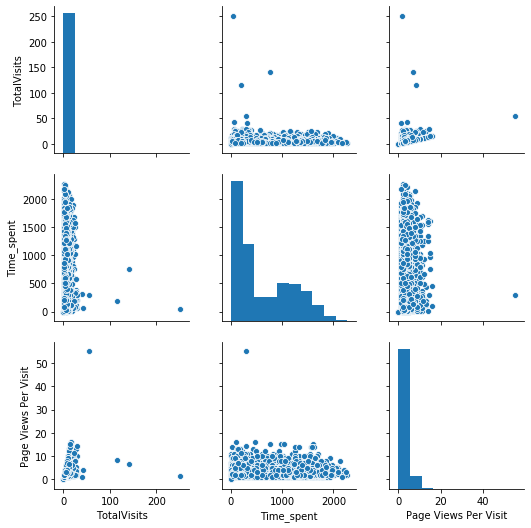

In [80]:
#plotting the numerical variables
sns.pairplot(data=leads,vars=['TotalVisits','Time_spent','Page Views Per Visit'])

#### Creating dummy variables

In [81]:
#Creating dummies for binary variables.
varlist =  ['Do Not Email','Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [82]:
# Creating a dummy variable for some of the categorical variables and dropping the first ones.
dummy1 = pd.get_dummies(leads[['Lead_Origin_new', 'Specialization', 'Lead_Source_new','Occupation_new','City_new']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [83]:
leads.head()   #displaying the dataset 

,Do Not Email,Converted,TotalVisits,Time_spent,Page Views Per Visit,Specialization,Interview,Lead_Origin_new,Lead_Source_new,Occupation_new,City_new,Lead_Origin_new_Landing Page Submission,Lead_Origin_new_Lead Add Form,Lead_Origin_new_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead_Source_new_Google,Lead_Source_new_Olark Chat,Lead_Source_new_Organic Search,Lead_Source_new_others,Occupation_new_Working Professional,Occupation_new_others,City_new_Other Cities,City_new_Other Cities of Maharashtra,City_new_Thane & Outskirts,City_new_others
2,0,1,2.0,1532,2.0,Business Administration,1,Landing Page Submission,Direct Traffic,others,Mumbai,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,Media and Advertising,0,Landing Page Submission,Direct Traffic,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,2.0,1640,2.0,Supply Chain Management,0,Landing Page Submission,Google,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
8,0,0,2.0,71,2.0,IT Projects Management,1,Landing Page Submission,Direct Traffic,Unemployed,Thane & Outskirts,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,4.0,58,4.0,Finance Management,0,API,Google,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [84]:
#As we created the dummy variables, we can drop these columns.
leads.drop(['Lead_Origin_new', 'Specialization', 'Lead_Source_new','Occupation_new','City_new'],1,inplace=True)

In [85]:
leads.shape 

(5860, 36)

In [86]:
#Checking the null values before proceeding to model.
leads.isnull().sum() 

Do Not Email                                0
Converted                                   0
TotalVisits                                 0
Time_spent                                  0
Page Views Per Visit                        0
Interview                                   0
Lead_Origin_new_Landing Page Submission     0
Lead_Origin_new_Lead Add Form               0
Lead_Origin_new_others                      0
Specialization_Business Administration      0
Specialization_E-Business                   0
Specialization_E-COMMERCE                   0
Specialization_Finance Management           0
Specialization_Healthcare Management        0
Specialization_Hospitality Management       0
Specialization_Human Resource Management    0
Specialization_IT Projects Management       0
Specialization_International Business       0
Specialization_Marketing Management         0
Specialization_Media and Advertising        0
Specialization_Operations Management        0
Specialization_Retail Management  

#### Train Test Splitting

In [87]:
from sklearn.model_selection import train_test_split
# Assigning feature variables to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Time_spent,Page Views Per Visit,Interview,Lead_Origin_new_Landing Page Submission,Lead_Origin_new_Lead Add Form,Lead_Origin_new_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead_Source_new_Google,Lead_Source_new_Olark Chat,Lead_Source_new_Organic Search,Lead_Source_new_others,Occupation_new_Working Professional,Occupation_new_others,City_new_Other Cities,City_new_Other Cities of Maharashtra,City_new_Thane & Outskirts,City_new_others
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,2.0,1640,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
8,0,2.0,71,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,4.0,58,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [88]:
X.shape   #Checking the shape

(5860, 35)

In [89]:
#Assigning response variable to y
y = leads['Converted']

y.head()

2    1
3    0
6    1
8    0
9    0
Name: Converted, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling 

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
#Applying Scaling to the numerical values

scaler = StandardScaler()

X_train[['TotalVisits','Time_spent','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Time_spent','Page Views Per Visit']])

X_train.head()   #Displaying the dataset.

,Do Not Email,TotalVisits,Time_spent,Page Views Per Visit,Interview,Lead_Origin_new_Landing Page Submission,Lead_Origin_new_Lead Add Form,Lead_Origin_new_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead_Source_new_Google,Lead_Source_new_Olark Chat,Lead_Source_new_Organic Search,Lead_Source_new_others,Occupation_new_Working Professional,Occupation_new_others,City_new_Other Cities,City_new_Other Cities of Maharashtra,City_new_Thane & Outskirts,City_new_others
6529,0,0.115876,0.114036,0.912624,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2509,0,-0.245224,0.692752,-0.007327,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
4265,0,-0.064674,-0.976481,0.452649,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4872,0,-0.425774,-1.005416,-0.467303,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3909,0,-0.245224,1.229872,-0.007327,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
### Checking the conversion Rate
Conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Conversion

44.232081911262796

#### Corerlation matrix

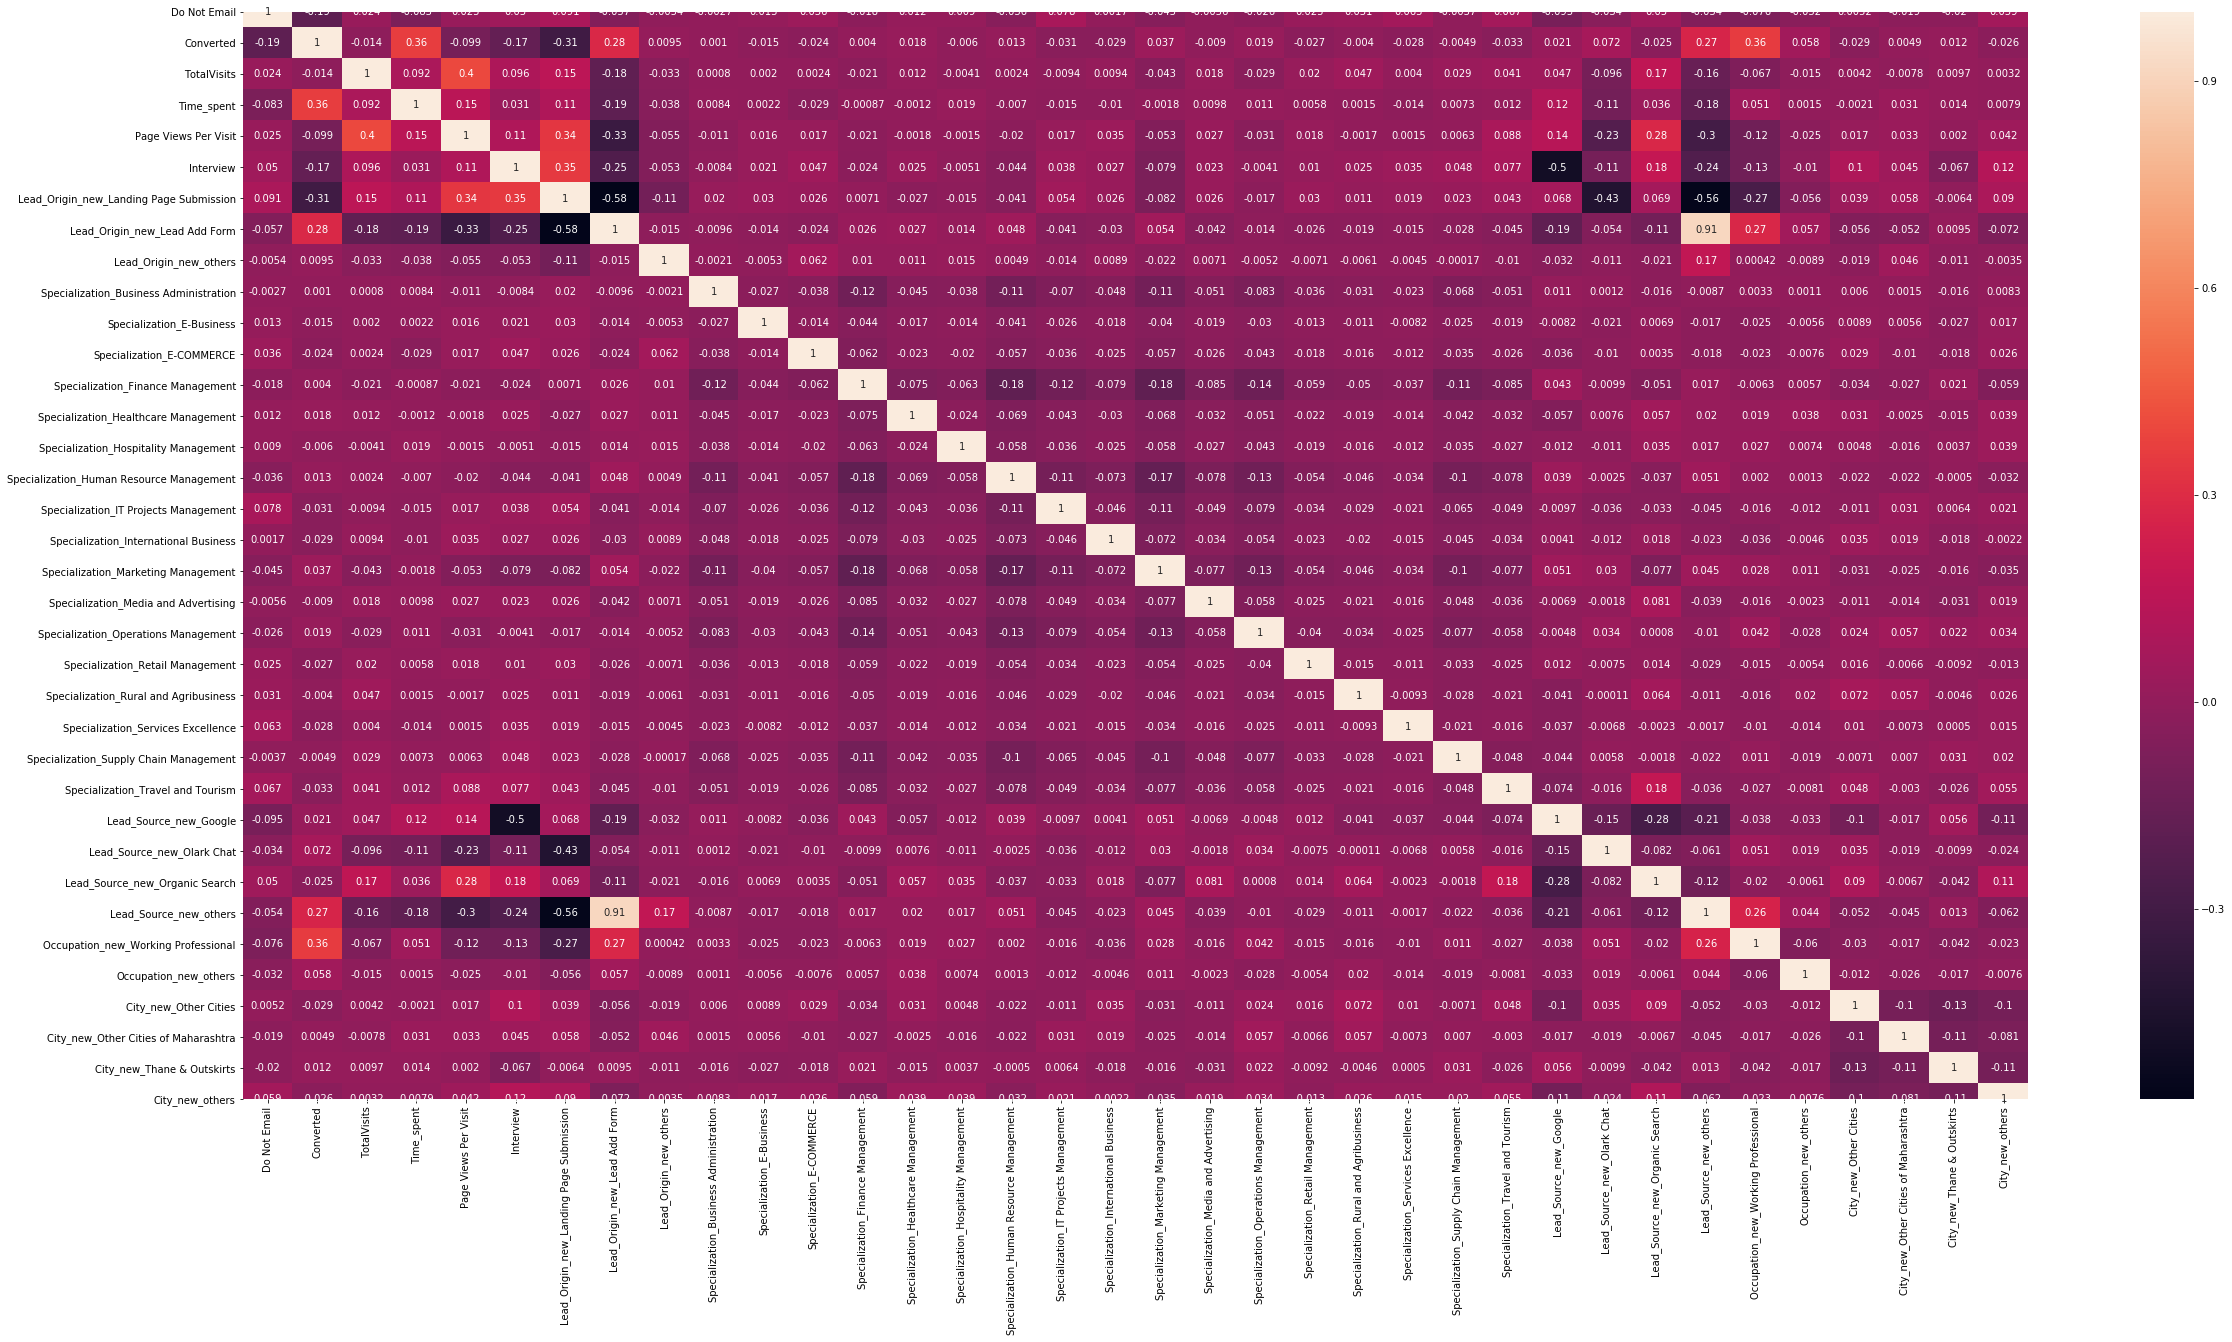

In [94]:
# Plotting the correlation matrix of all the variables and finding highly correlated variables.
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

#### Dropping highly Correlated variables 

In [95]:
#Dropping the highly correlated variables from both train and test sets.
X_train = X_train.drop(['Interview','Lead_Origin_new_Landing Page Submission','Lead_Origin_new_Lead Add Form','Lead_Source_new_Google'],1)
X_test = X_test.drop(['Interview','Lead_Origin_new_Landing Page Submission','Lead_Origin_new_Lead Add Form','Lead_Source_new_Google'],1)


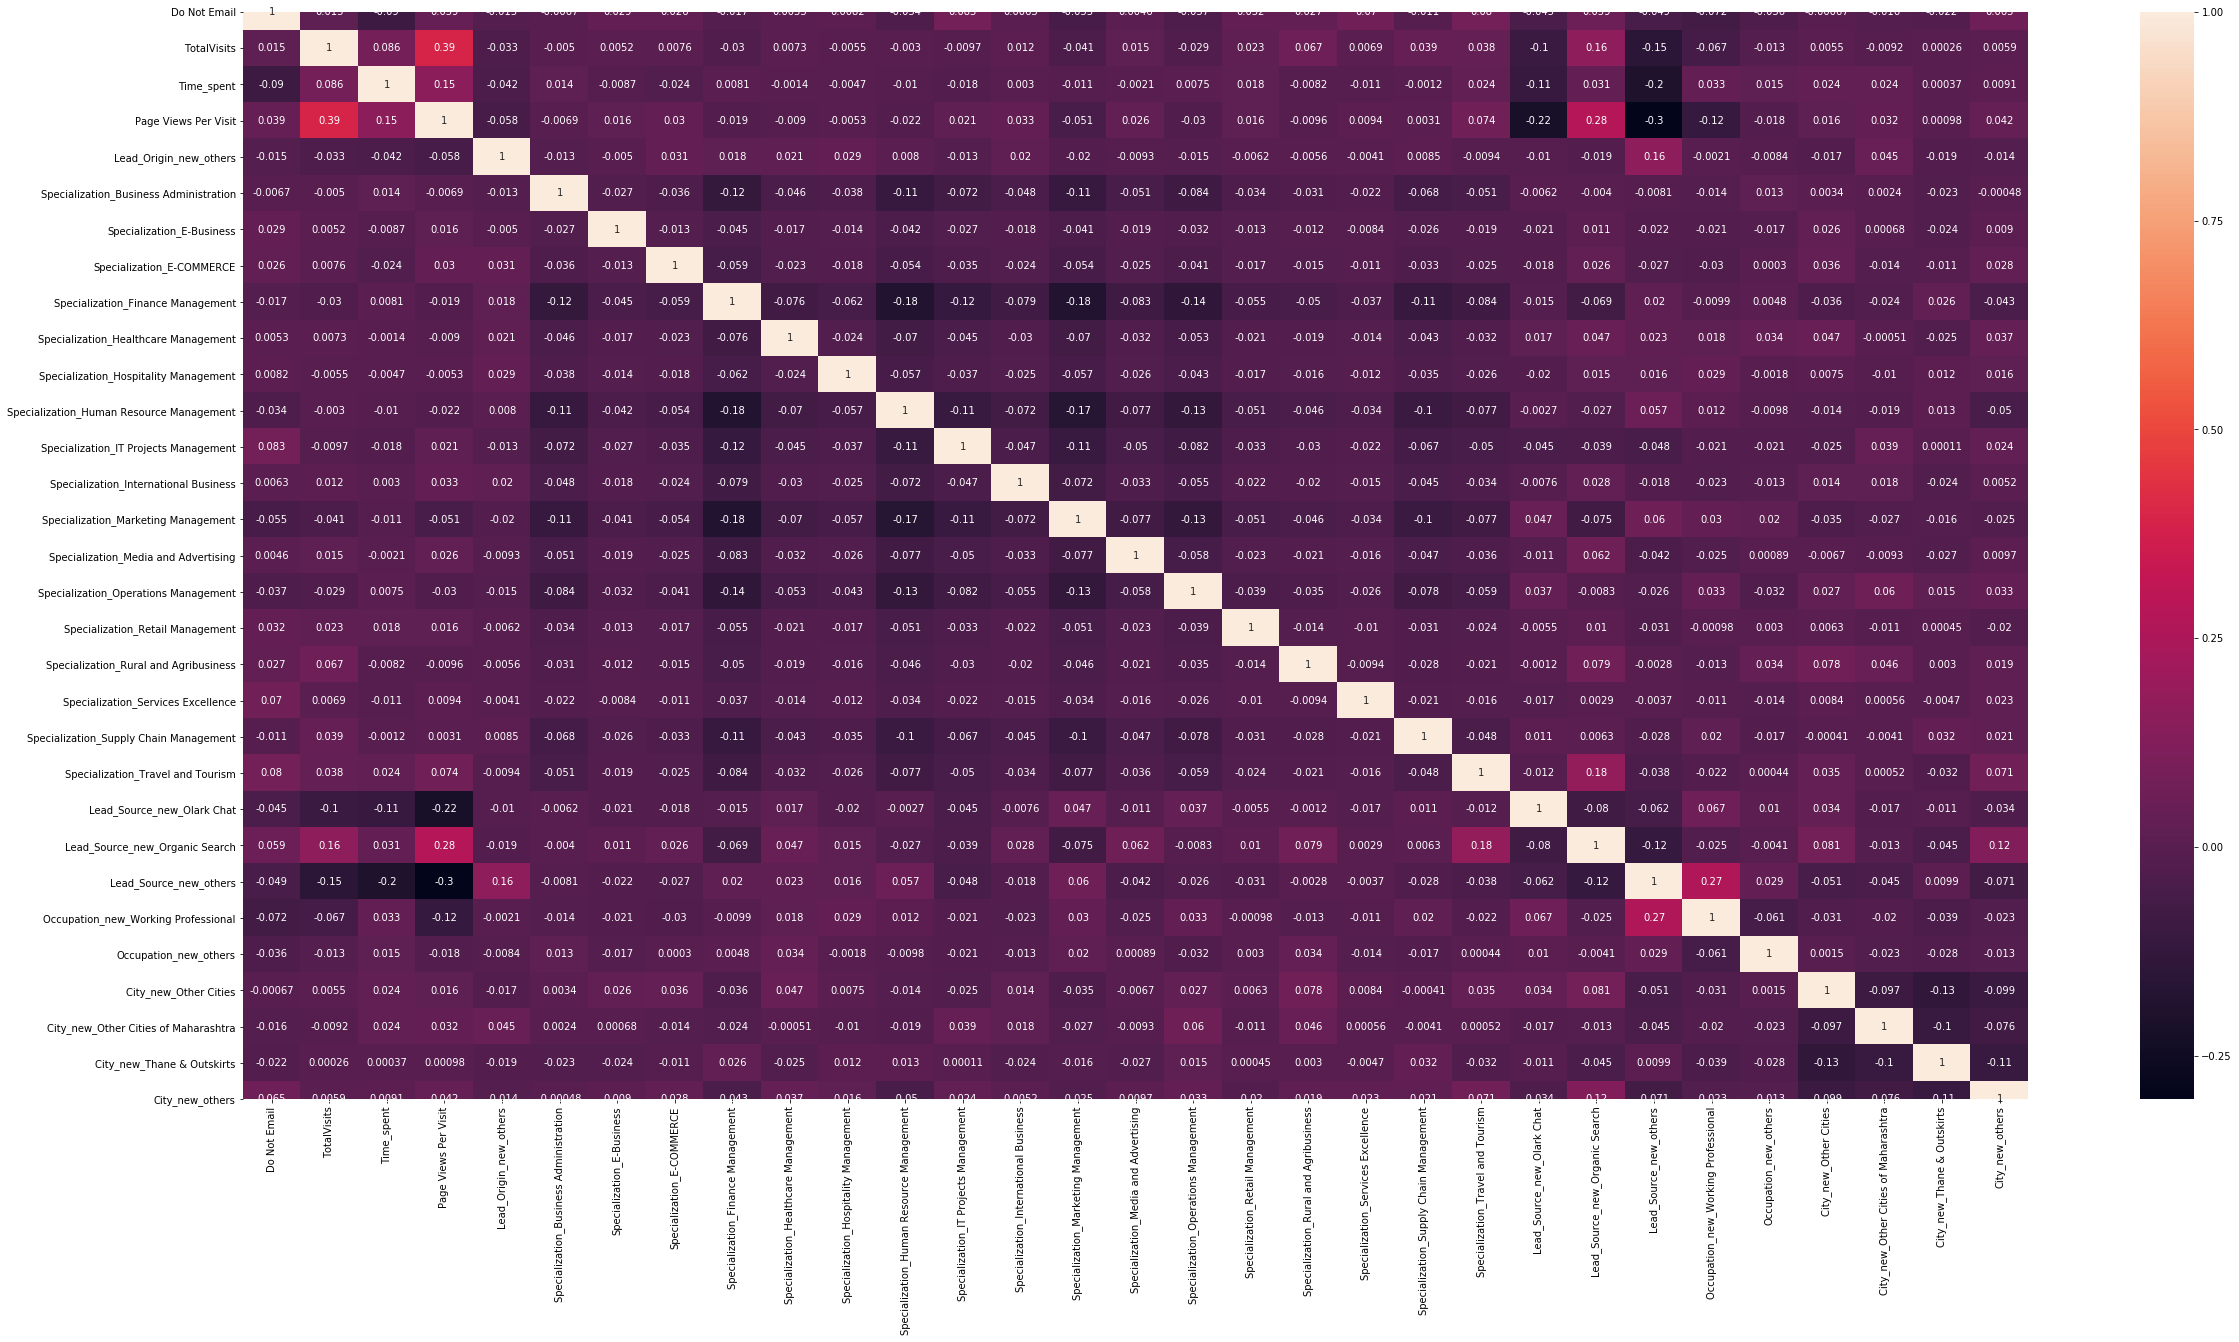

In [96]:
#Plotting the correlation matrix after dropping the variables.
plt.figure(figsize = (40,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Model Building

In [97]:
import statsmodels.api as sm

In [98]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4070
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1962.1
Date:                Tue, 25 Aug 2020   Deviance:                       3924.3
Time:                        02:36:26   Pearson chi2:                 5.22e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5436      0.162     -3.352      0.001      -0.861      -0.226
Do Not Email                                -1.5717      0.196     -8.030      0.000      -1.955      -1.188
TotalVisits                                  0.1951      0.073      2.656      0.008       0.051       0.339
Time_spent                                   1.0498      0.043     24.239      0.000       0.965       1.135
Page Views Per Visit                        -0.1279      0.055     -2.323      0.020      -0.236      -0.020
Lead_Origin_new_others                      -1.3595      0.722     -1.882      0.060      -2.775       0.056
Specialization_Business Administration      -0.2549      0.218     -1.167      0.243      -0.683       0.173
Specialization_E-Business                   -0.3208      0.429     -0.748      0.454      -1.161       0.520
Specialization_E-COMMERCE                   -0.3625      0.347     -1.044      0.297      -1.043       0.318
Specialization_Finance Management           -0.2167      0.185     -1.169      0.242      -0.580       0.147
Specialization_Healthcare Management        -0.0696      0.284     -0.245      0.806      -0.626       0.487
Specialization_Hospitality Management       -0.7914      0.340     -2.330      0.020      -1.457      -0.126
Specialization_Human Resource Management    -0.2614      0.189     -1.385      0.166      -0.631       0.108
Specialization_IT Projects Management       -0.0615      0.223     -0.276      0.783      -0.498       0.375
Specialization_International Business       -0.5399      0.281     -1.922      0.055      -1.090       0.011
Specialization_Marketing Management         -0.1084      0.189     -0.574      0.566      -0.478       0.261
Specialization_Media and Advertising        -0.2334      0.264     -0.885      0.376      -0.751       0.284
Specialization_Operations Management        -0.0511      0.208     -0.246      0.806      -0.458       0.356
Specialization_Retail Management            -0.3883      0.360     -1.077      0.281      -1.095       0.318
Specialization_Rural and Agribusiness       -0.5406      0.396     -1.365      0.172      -1.317       0.235
Specialization_Services Excellence          -1.1163      0.618     -1.805      0.071      -2.328       0.096
Specialization_Supply Chain Management      -0.3169      0.228     -1.392      0.164      -0.763       0.129
Specialization_Travel and Tourism           -0.1840      0.267     -0.689      0.491      -0.708       0.340
Lead_Source_new_Olark Chat                   1.4605      0.204      7.171      0.000       1.061       1.860
Lead_Source_new_Organic Search               0.1220      0.126      0.970      0.332      -0.124       0.369
Lead_Source_new_others         

#### Feature Selection using RFE model.

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [100]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with  variables as output
rfe = rfe.fit(X_train, y_train)

In [101]:
rfe.support_

array([ True, False,  True, False,  True, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False])

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 7),
 ('Time_spent', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead_Origin_new_others', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 5),
 ('Specialization_Healthcare Management', False, 15),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_IT Projects Management', False, 16),
 ('Specialization_International Business', True, 1),
 ('Specialization_Marketing Management', False, 12),
 ('Specialization_Media and Advertising', False, 6),
 ('Specialization_Operations Management', False, 14),
 ('Specialization_Retail Management', True, 1),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Services Excellence', True, 1),
 ('Specialization_Supply Chain Management', False, 2),
 ('Specialization_

In [103]:
col = X_train.columns[rfe.support_]

In [104]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead_Source_new_Organic Search',
       'City_new_Other Cities of Maharashtra', 'City_new_Thane & Outskirts',
       'City_new_others'],
      dtype='object')

#### Assessing the model with StatsModels 

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4086
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.1
Date:                Tue, 25 Aug 2020   Deviance:                       3944.2
Time:                        02:36:31   Pearson chi2:                 5.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6855      0.048    -14.280      0.000      -0.780      -0.591
Do Not Email                             -1.5620      0.193     -8.081      0.000      -1.941      -1.183
Time_spent                                1.0454      0.043     24.310      0.000       0.961       1.130
Lead_Origin_new_others                   -1.3779      0.720     -1.913      0.056      -2.790       0.034
Specialization_E-Business                -0.1635      0.404     -0.405      0.686      -0.955       0.629
Specialization_E-COMMERCE                -0.1928      0.310     -0.622      0.534      -0.800       0.415
Specialization_Hospitality Management    -0.6164      0.303     -2.036      0.042      -1.210      -0.023
Specialization_International Business    -0.3586      0.234     -1.531      0.126      -0.818       0.100
Specialization_Retail Management         -0.2132      0.327     -0.652      0.514      -0.854       0.428
Specialization_Rural and Agribusiness    -0.1995      0.353     -0.564      0.572      -0.892       0.493
Specialization_Services Excellence       -0.9398      0.602     -1.561      0.118      -2.120       0.240
Lead_Source_new_Olark Chat                1.4774      0.193      7.637      0.000       1.098       1.857
Lead_Source_new_others                    3.3521      0.207     16.197      0.000       2.946       3.758
Occupation_new_Working Professional       2.8287      0.196     14.421      0.000       2.444       3.213
Occupation_new_others                     0.8793      0.225      3.909      0.000       0.438       1.320
City_new_Other Cities                    -0.1900      0.126     -1.512      0.131      -0.436       0.056
=========================================================================================================
"""

In [106]:
#From the above, we can see high insignificant p-values. So,dropping some variables and rebuilding the modelis needed.

In [107]:
#"Specialization_E-Business" has high p value which needs to be considered.So,dropping the variable
col = col.drop('Specialization_E-Business')
col

Index(['Do Not Email', 'Time_spent', 'Lead_Origin_new_others',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead_Source_new_Olark Chat',
       'Lead_Source_new_others', 'Occupation_new_Working Professional',
       'Occupation_new_others', 'City_new_Other Cities'],
      dtype='object')

In [108]:
# Run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4087
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.2
Date:                Tue, 25 Aug 2020   Deviance:                       3944.4
Time:                        02:36:31   Pearson chi2:                 5.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6873      0.048    -14.383      0.000      -0.781      -0.594
Do Not Email                             -1.5629      0.193     -8.088      0.000      -1.942      -1.184
Time_spent                                1.0456      0.043     24.316      0.000       0.961       1.130
Lead_Origin_new_others                   -1.3774      0.720     -1.913      0.056      -2.789       0.034
Specialization_E-COMMERCE                -0.1908      0.310     -0.615      0.538      -0.798       0.417
Specialization_Hospitality Management    -0.6147      0.303     -2.030      0.042      -1.208      -0.021
Specialization_International Business    -0.3568      0.234     -1.524      0.128      -0.816       0.102
Specialization_Retail Management         -0.2115      0.327     -0.647      0.518      -0.852       0.429
Specialization_Rural and Agribusiness    -0.1977      0.353     -0.559      0.576      -0.891       0.495
Specialization_Services Excellence       -0.9379      0.602     -1.558      0.119      -2.118       0.242
Lead_Source_new_Olark Chat                1.4793      0.193      7.648      0.000       1.100       1.858
Lead_Source_new_others                    3.3530      0.207     16.202      0.000       2.947       3.759
Occupation_new_Working Professional       2.8296      0.196     14.426      0.000       2.445       3.214
Occupation_new_others                     0.8809      0.225      3.916      0.000       0.440       1.322
City_new_Other Cities                    -0.1909      0.126     -1.519      0.129      -0.437       0.055
=========================================================================================================
"""

In [109]:
#"Specialization_Rural and Agribusiness" has high p value which needs to be considered.So,dropping the variable
col = col.drop('Specialization_Rural and Agribusiness')
col

Index(['Do Not Email', 'Time_spent', 'Lead_Origin_new_others',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Services Excellence', 'Lead_Source_new_Olark Chat',
       'Lead_Source_new_others', 'Occupation_new_Working Professional',
       'Occupation_new_others', 'City_new_Other Cities'],
      dtype='object')

In [110]:
# Run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4088
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.4
Date:                Tue, 25 Aug 2020   Deviance:                       3944.7
Time:                        02:36:31   Pearson chi2:                 5.26e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6891      0.048    -14.448      0.000      -0.783      -0.596
Do Not Email                             -1.5654      0.193     -8.097      0.000      -1.944      -1.186
Time_spent                                1.0455      0.043     24.317      0.000       0.961       1.130
Lead_Origin_new_others                   -1.3743      0.720     -1.909      0.056      -2.786       0.037
Specialization_E-COMMERCE                -0.1876      0.310     -0.605      0.545      -0.795       0.420
Specialization_Hospitality Management    -0.6117      0.303     -2.021      0.043      -1.205      -0.018
Specialization_International Business    -0.3541      0.234     -1.512      0.130      -0.813       0.105
Specialization_Retail Management         -0.2086      0.327     -0.638      0.524      -0.849       0.432
Specialization_Services Excellence       -0.9347      0.602     -1.553      0.120      -2.115       0.245
Lead_Source_new_Olark Chat                1.4790      0.193      7.647      0.000       1.100       1.858
Lead_Source_new_others                    3.3506      0.207     16.200      0.000       2.945       3.756
Occupation_new_Working Professional       2.8288      0.196     14.422      0.000       2.444       3.213
Occupation_new_others                     0.8756      0.225      3.896      0.000       0.435       1.316
City_new_Other Cities                    -0.1962      0.125     -1.565      0.117      -0.442       0.049
=========================================================================================================
"""

In [111]:
#"Specialization_E-COMMERCE" has high p value which needs to be considered.So,dropping the variable
col = col.drop('Specialization_E-COMMERCE')
col

Index(['Do Not Email', 'Time_spent', 'Lead_Origin_new_others',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Services Excellence', 'Lead_Source_new_Olark Chat',
       'Lead_Source_new_others', 'Occupation_new_Working Professional',
       'Occupation_new_others', 'City_new_Other Cities'],
      dtype='object')

In [112]:
#"Specialization_Retail Management" has high p value which needs to be considered.So,dropping the variable
col = col.drop('Specialization_Retail Management')
col

Index(['Do Not Email', 'Time_spent', 'Lead_Origin_new_others',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Services Excellence', 'Lead_Source_new_Olark Chat',
       'Lead_Source_new_others', 'Occupation_new_Working Professional',
       'Occupation_new_others', 'City_new_Other Cities'],
      dtype='object')

In [113]:
# Run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4090
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.7
Date:                Tue, 25 Aug 2020   Deviance:                       3945.5
Time:                        02:36:31   Pearson chi2:                 5.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6955      0.047    -14.747      0.000      -0.788      -0.603
Do Not Email                             -1.5699      0.193     -8.125      0.000      -1.949      -1.191
Time_spent                                1.0456      0.043     24.336      0.000       0.961       1.130
Lead_Origin_new_others                   -1.3965      0.718     -1.944      0.052      -2.805       0.012
Specialization_Hospitality Management    -0.6048      0.303     -1.998      0.046      -1.198      -0.012
Specialization_International Business    -0.3472      0.234     -1.484      0.138      -0.806       0.111
Specialization_Services Excellence       -0.9281      0.602     -1.541      0.123      -2.108       0.252
Lead_Source_new_Olark Chat                1.4827      0.193      7.666      0.000       1.104       1.862
Lead_Source_new_others                    3.3552      0.207     16.228      0.000       2.950       3.760
Occupation_new_Working Professional       2.8279      0.196     14.421      0.000       2.444       3.212
Occupation_new_others                     0.8753      0.225      3.893      0.000       0.435       1.316
City_new_Other Cities                    -0.1992      0.125     -1.591      0.112      -0.445       0.046
=========================================================================================================
"""

In [114]:
#"Specialization_International Business" has high p value which needs to be considered.So,dropping the variable
col = col.drop('Specialization_International Business')
col

Index(['Do Not Email', 'Time_spent', 'Lead_Origin_new_others',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence', 'Lead_Source_new_Olark Chat',
       'Lead_Source_new_others', 'Occupation_new_Working Professional',
       'Occupation_new_others', 'City_new_Other Cities'],
      dtype='object')

In [115]:
# Run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4091
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1973.9
Date:                Tue, 25 Aug 2020   Deviance:                       3947.7
Time:                        02:36:32   Pearson chi2:                 5.26e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7062      0.047    -15.140      0.000      -0.798      -0.615
Do Not Email                             -1.5741      0.193     -8.139      0.000      -1.953      -1.195
Time_spent                                1.0450      0.043     24.335      0.000       0.961       1.129
Lead_Origin_new_others                   -1.4304      0.716     -1.997      0.046      -2.834      -0.027
Specialization_Hospitality Management    -0.5937      0.303     -1.962      0.050      -1.187      -0.001
Specialization_Services Excellence       -0.9170      0.602     -1.523      0.128      -2.097       0.263
Lead_Source_new_Olark Chat                1.4847      0.193      7.676      0.000       1.106       1.864
Lead_Source_new_others                    3.3570      0.207     16.253      0.000       2.952       3.762
Occupation_new_Working Professional       2.8301      0.196     14.441      0.000       2.446       3.214
Occupation_new_others                     0.8803      0.225      3.917      0.000       0.440       1.321
City_new_Other Cities                    -0.1993      0.125     -1.593      0.111      -0.444       0.046
=========================================================================================================
"""

In [116]:
#"Specialization_Services Excellence" has high p value which needs to be considered.So,dropping the variable
col = col.drop('Specialization_Services Excellence')
col

Index(['Do Not Email', 'Time_spent', 'Lead_Origin_new_others',
       'Specialization_Hospitality Management', 'Lead_Source_new_Olark Chat',
       'Lead_Source_new_others', 'Occupation_new_Working Professional',
       'Occupation_new_others', 'City_new_Other Cities'],
      dtype='object')

In [117]:
# Run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4092
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1975.2
Date:                Tue, 25 Aug 2020   Deviance:                       3950.3
Time:                        02:36:32   Pearson chi2:                 5.26e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7105      0.047    -15.253      0.000      -0.802      -0.619
Do Not Email                             -1.5881      0.193     -8.225      0.000      -1.967      -1.210
Time_spent                                1.0452      0.043     24.350      0.000       0.961       1.129
Lead_Origin_new_others                   -1.4188      0.716     -1.981      0.048      -2.822      -0.015
Specialization_Hospitality Management    -0.5887      0.303     -1.945      0.052      -1.182       0.004
Lead_Source_new_Olark Chat                1.4892      0.193      7.699      0.000       1.110       1.868
Lead_Source_new_others                    3.3492      0.206     16.237      0.000       2.945       3.753
Occupation_new_Working Professional       2.8324      0.196     14.448      0.000       2.448       3.217
Occupation_new_others                     0.8850      0.225      3.938      0.000       0.445       1.325
City_new_Other Cities                    -0.2003      0.125     -1.603      0.109      -0.445       0.045
=========================================================================================================
"""

In [118]:
# Checking VIF values of the feature variables for the model. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
5,Lead_Source_new_others,1.24
6,Occupation_new_Working Professional,1.18
1,Time_spent,1.08
4,Lead_Source_new_Olark Chat,1.05
2,Lead_Origin_new_others,1.03
8,City_new_Other Cities,1.03
0,Do Not Email,1.02
3,Specialization_Hospitality Management,1.01
7,Occupation_new_others,1.01


In [120]:
#This is the final model,which has pvalues significant and VIF's in permissible range.

In [121]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6529    0.903882
2509    0.667804
4265    0.150445
4872    0.146621
3909    0.639919
6228    0.297797
7298    0.086206
1022    0.498675
7398    0.036214
9076    0.978572
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90388211, 0.66780448, 0.1504454 , 0.14662056, 0.63991917,
       0.29779736, 0.08620612, 0.49867537, 0.03621399, 0.97857231])

#### Creating a dataframe with actual converted and predicted probabilities.

In [123]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_score':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_score,Lead ID
0,1,0.903882,6529
1,1,0.667804,2509
2,0,0.150445,4265
3,1,0.146621,4872
4,1,0.639919,3909


In [124]:
###Creating new variable predicted considering cut-off as 0.5.

In [125]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_score.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Lead_score,Lead ID,predicted
0,1,0.903882,6529,1
1,1,0.667804,2509,1
2,0,0.150445,4265,0
3,1,0.146621,4872,0
4,1,0.639919,3909,1


In [126]:
#We will check the basic metrics for the output obtained.

In [127]:
from sklearn import metrics

In [128]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[1915  385]
 [ 542 1260]]


In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7740126767430522


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6992230854605993

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8326086956521739

#### Plotting ROC curve 

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_score, drop_intermediate = False )

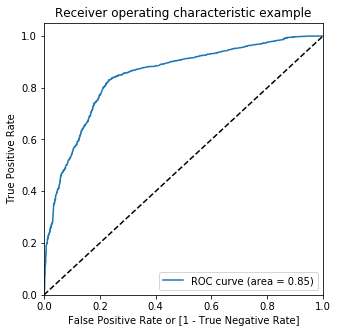

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_score)

#### Finding optimal cut-off 

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_score,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.903882,6529,1,1,1,1,1,1,1,1,1,1,1
1,1,0.667804,2509,1,1,1,1,1,1,1,1,0,0,0
2,0,0.150445,4265,0,1,1,0,0,0,0,0,0,0,0
3,1,0.146621,4872,0,1,1,0,0,0,0,0,0,0,0
4,1,0.639919,3909,1,1,1,1,1,1,1,1,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.439298  1.000000  0.000000
0.1   0.1  0.499025  0.995560  0.110000
0.2   0.2  0.675768  0.912875  0.490000
0.3   0.3  0.783276  0.846282  0.733913
0.4   0.4  0.793028  0.805771  0.783043
0.5   0.5  0.774013  0.699223  0.832609
0.6   0.6  0.753047  0.594340  0.877391
0.7   0.7  0.733057  0.481132  0.930435
0.8   0.8  0.696977  0.359046  0.961739
0.9   0.9  0.651146  0.224750  0.985217


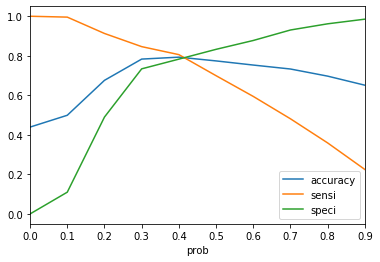

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [139]:
#From the above curve, we can conclude the cut-off as 0.41

In [140]:
#Creating new variable final_predicted for cut-off as 0.41
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_score.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Lead_score,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.903882,6529,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.667804,2509,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.150445,4265,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.146621,4872,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.639919,3909,1,1,1,1,1,1,1,1,0,0,0,1


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7935153583617748

In [142]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1811,  489],
       [ 358, 1444]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8013318534961155

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.7873913043478261

In [146]:
from sklearn.metrics import precision_score, recall_score

In [147]:
Precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
Precision

0.7659574468085106

In [148]:
Recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
Recall

0.6992230854605993

In [149]:
F1_score = 2*(Precision*Recall)/(Precision+Recall)
F1_score

0.7310704960835509

#### Making Predictions on the test set

In [150]:
X_test[['TotalVisits','Time_spent','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Time_spent','Page Views Per Visit']])


In [153]:
X_test = X_test[col]
X_test.shape

(1758, 9)

In [152]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(1758, 10)

In [153]:
#Making predictions on the test set

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

7412    0.935589
1749    0.784450
7782    0.238965
7751    0.281466
8638    0.171885
3517    0.057869
1973    0.934671
7601    0.175411
1742    0.232837
8259    0.235885
dtype: float64

In [156]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head
y_pred_1.head()

,0
7412,0.935589
1749,0.784450
7782,0.238965
7751,0.281466
8638,0.171885


In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [159]:
# Putting "Lead ID" to index
y_test_df['Lead ID'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
y_pred_final.head() 

,Converted,Lead ID,0
0,1,7412,0.935589
1,0,1749,0.784450
2,0,7782,0.238965
3,0,7751,0.281466
4,1,8638,0.171885


In [163]:
# Renaming the column as "Lead_score"
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_score'})

In [164]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead ID,Lead_score
0,1,7412,0.935589
1,0,1749,0.784450
2,0,7782,0.238965
3,0,7751,0.281466
4,1,8638,0.171885


In [165]:
y_pred_final['final_predicted'] = y_pred_final.Lead_score.map(lambda x: 1 if x > 0.41 else 0)

In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.78839590443686

In [167]:
#Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[762, 206],
       [166, 624]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.789873417721519

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.7871900826446281

In [171]:
Precision = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
Precision

0.7518072289156627

In [172]:
Recall = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
Recall

0.789873417721519

In [173]:
F1_score = 2*(Precision*Recall)/(Precision+Recall)
F1_score

0.7703703703703705

In [174]:
Final_df = y_pred_final[['Lead ID','Lead_score']]
Final_df.head()

,Lead ID,Lead_score
0,7412,0.935589
1,1749,0.784450
2,7782,0.238965
3,7751,0.281466
4,8638,0.171885


In [175]:
Final_df['Lead_score'] = 100*Final_df['Lead_score'].round(2)
Final_df.head()

,Lead ID,Lead_score
0,7412,94.0
1,1749,78.0
2,7782,24.0
3,7751,28.0
4,8638,17.0


From the model,scores are assigned to the individual leads. Based on the scores, the sales team will now approach more to the potential leads results in increase of the hot leads.Hence, we can infer that, there will be more chances of conversion rate.